# Xception architecture using CUB dataset
In this notebook I will attempt to train the [Xception](https://keras.io/api/applications/xception/) CNN model architecture using weights derived from the `imagenet` dataset on the Caltech-UCSD Birds-200-2011 (CUB-200-2011) datset in order to classify images of birds into 200 classes.

## Load Metadata: Caltech-UCSD Birds-200-2011 (CUB-200-2011)
* Number of categories: 200
* Number of images: 11,788
* Annotations per image: 15 Part Locations, 312 Binary Attributes, 1 Bounding Box

In [1]:
import tarfile
import pandas as pd

from IPython.display import Image

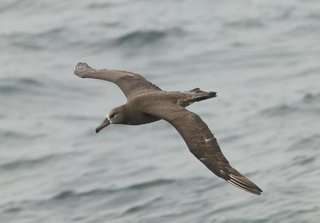

In [2]:
tar_fn = "../cub/CUB_200_2011.tgz"

testfile_fn = "CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg"
with tarfile.open(tar_fn, "r:gz") as tar:
    image = tar.extractfile(testfile_fn)
    display(Image(data=image.read()))

In [3]:
# Set up filenames to extract metadata from
prefix = "CUB_200_2011/"
metadata = {
    "bounding_boxes": "bounding_boxes.txt",
    "classes": "classes.txt",
    "image_class_labels": "image_class_labels.txt",
    "images": "images.txt",
    "train_test_split": "train_test_split.txt",
}

# add first folder (prefix) to all filenames
for key, filename in metadata.items():
    metadata[key] = prefix + filename

# extract metadata to dataframes
with tarfile.open(tar_fn, "r:*") as tar:
    for key, filename in metadata.items():
        file = tar.extractfile(filename)
        metadata[key] = pd.read_csv(
            file,
            sep=' ',
            index_col=0,
            header=None,
        )


In [4]:

for key, df in metadata.items():
    print(key)
    print(df.shape)
    print(f'Any NaNs? {df.isnull().values.any()}' )
    print(df.head())
    print()

bounding_boxes
(11788, 4)
Any NaNs? False
       1      2      3      4
0                            
1   60.0   27.0  325.0  304.0
2  139.0   30.0  153.0  264.0
3   14.0  112.0  388.0  186.0
4  112.0   90.0  255.0  242.0
5   70.0   50.0  134.0  303.0

classes
(200, 1)
Any NaNs? False
                            1
0                            
1  001.Black_footed_Albatross
2        002.Laysan_Albatross
3         003.Sooty_Albatross
4       004.Groove_billed_Ani
5          005.Crested_Auklet

image_class_labels
(11788, 1)
Any NaNs? False
   1
0   
1  1
2  1
3  1
4  1
5  1

images
(11788, 1)
Any NaNs? False
                                                   1
0                                                   
1  001.Black_footed_Albatross/Black_Footed_Albatr...
2  001.Black_footed_Albatross/Black_Footed_Albatr...
3  001.Black_footed_Albatross/Black_Footed_Albatr...
4  001.Black_footed_Albatross/Black_Footed_Albatr...
5  001.Black_footed_Albatross/Black_Footed_Albatr...

train_test_spli

In [5]:
for key, df in metadata.items():
    if (df.shape[1] > 1):
        df.columns = [ f'{key}.{x}' for x in df.columns]
    else:
        df.columns = [ key ]
    print(df.columns)

Index(['bounding_boxes.1', 'bounding_boxes.2', 'bounding_boxes.3',
       'bounding_boxes.4'],
      dtype='object')
Index(['classes'], dtype='object')
Index(['image_class_labels'], dtype='object')
Index(['images'], dtype='object')
Index(['train_test_split'], dtype='object')


In [6]:
images = metadata['images'].join( [
    metadata['bounding_boxes'],
    metadata['image_class_labels'],
    metadata['train_test_split'],
] )

In [7]:
images = images.join( metadata['classes'], on='image_class_labels')
images.pop("image_class_labels")

0
1          1
2          1
3          1
4          1
5          1
        ... 
11784    200
11785    200
11786    200
11787    200
11788    200
Name: image_class_labels, Length: 11788, dtype: int64

In [8]:
images

,images,bounding_boxes.1,bounding_boxes.2,bounding_boxes.3,bounding_boxes.4,train_test_split,classes
0,,,,,,,
1,001.Black_footed_Albatross/Black_Footed_Albatr...,60.0,27.0,325.0,304.0,0,001.Black_footed_Albatross
2,001.Black_footed_Albatross/Black_Footed_Albatr...,139.0,30.0,153.0,264.0,1,001.Black_footed_Albatross
3,001.Black_footed_Albatross/Black_Footed_Albatr...,14.0,112.0,388.0,186.0,0,001.Black_footed_Albatross
4,001.Black_footed_Albatross/Black_Footed_Albatr...,112.0,90.0,255.0,242.0,1,001.Black_footed_Albatross
5,001.Black_footed_Albatross/Black_Footed_Albatr...,70.0,50.0,134.0,303.0,1,001.Black_footed_Albatross
...,...,...,...,...,...,...,...
11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,89.0,95.0,354.0,250.0,1,200.Common_Yellowthroat
11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,157.0,62.0,184.0,219.0,0,200.Common_Yellowthroat
11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,190.0,102.0,198.0,202.0,0,200.Common_Yellowthroat
